In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

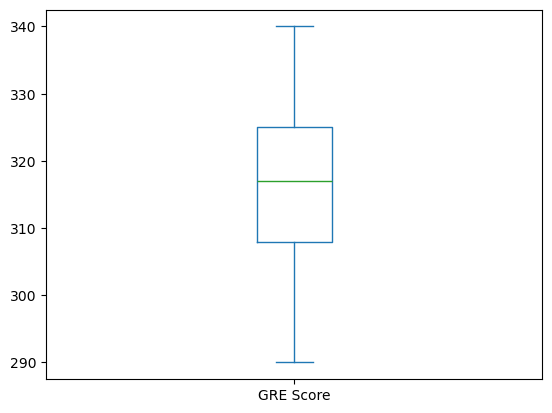

In [8]:
data["GRE Score"].plot.box()

In [9]:
def box_plot(col):
    plt.figure()
    data[col].plot(kind="box")
    plt.title(f"Box plot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

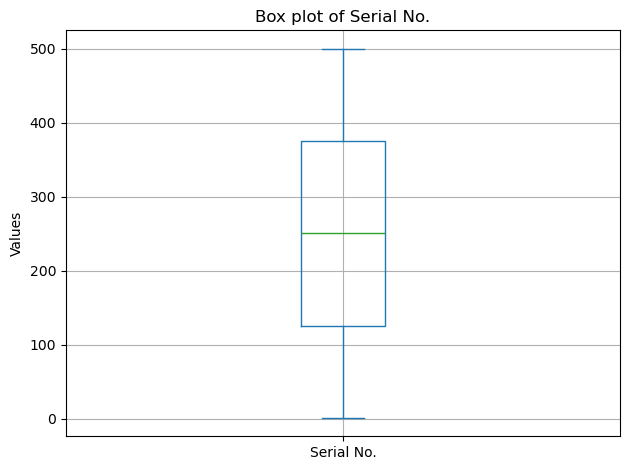

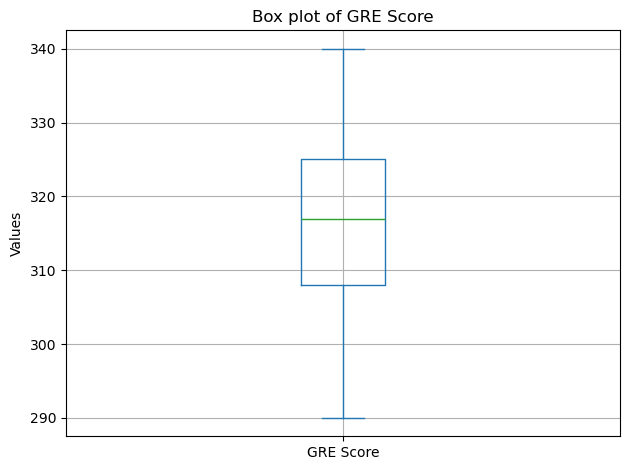

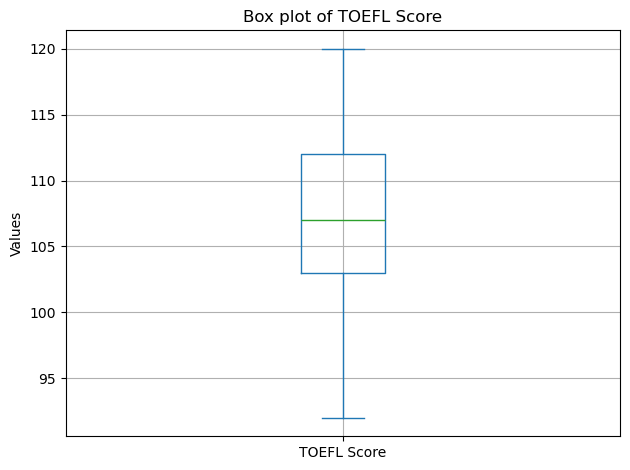

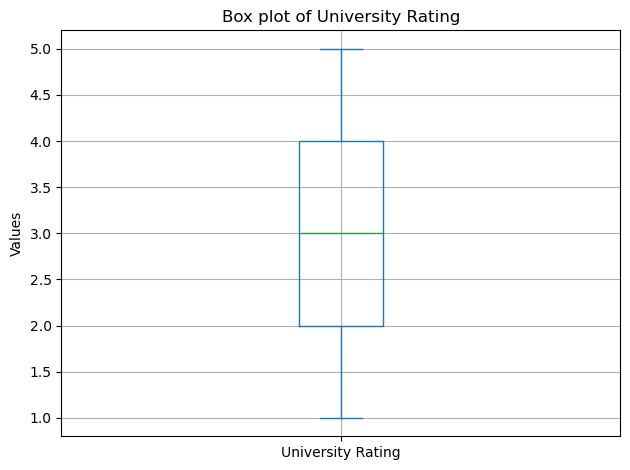

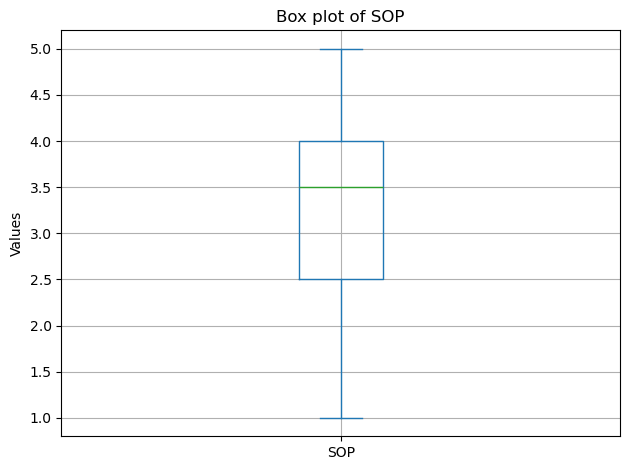

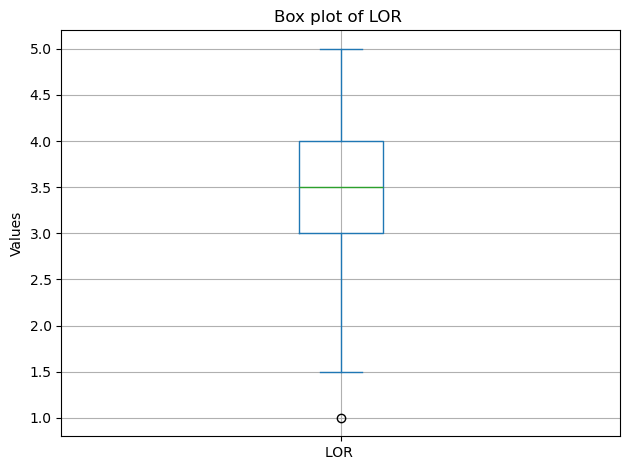

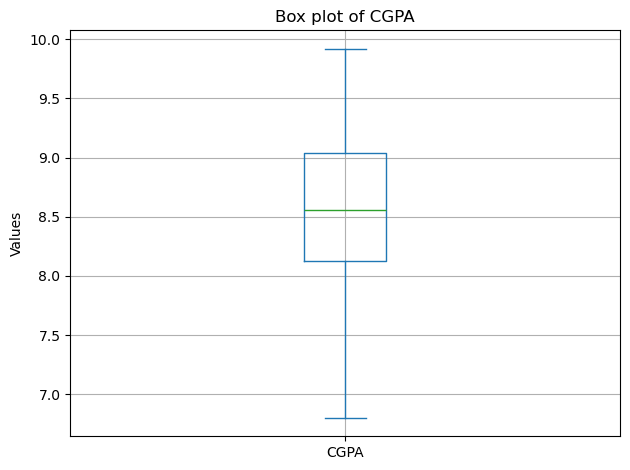

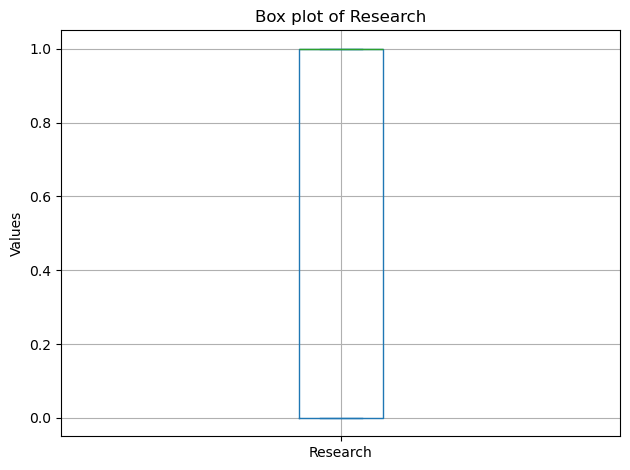

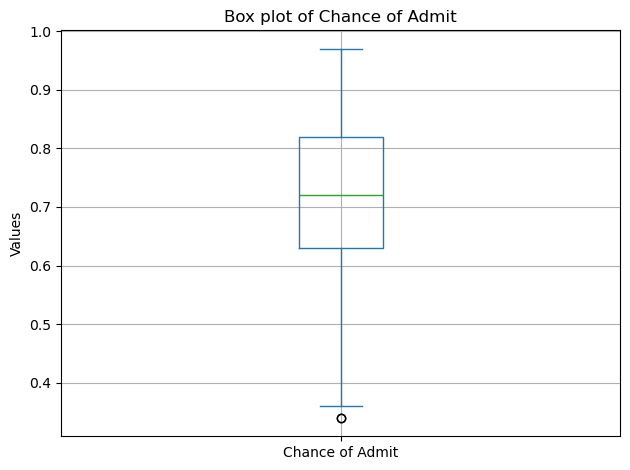

In [10]:
for col in data.columns:
    box_plot(col)

In [11]:
def bar_plot():
    plt.figure
    data["University Rating"].value_counts( ).plot(kind="bar")
    plt.title("Bar plot of University Rating")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

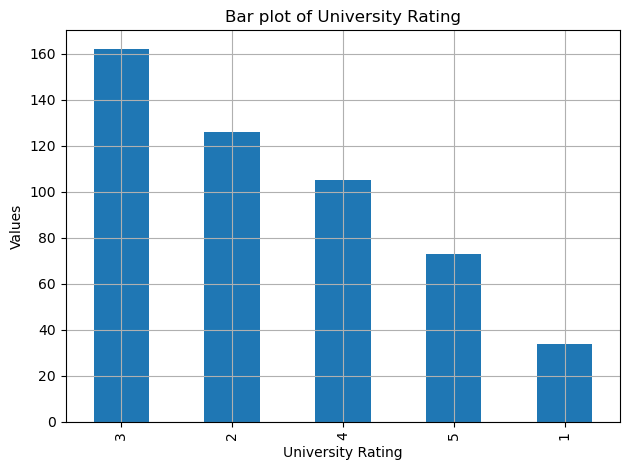

In [12]:
bar_plot()

In [13]:
def bar_plot(col):
    plt.figure()
    data[col].value_counts().plot(kind="bar",rot=90)
    plt.title(f"Bar plot {col}")
    plt.xticks(fontsize=7)    
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

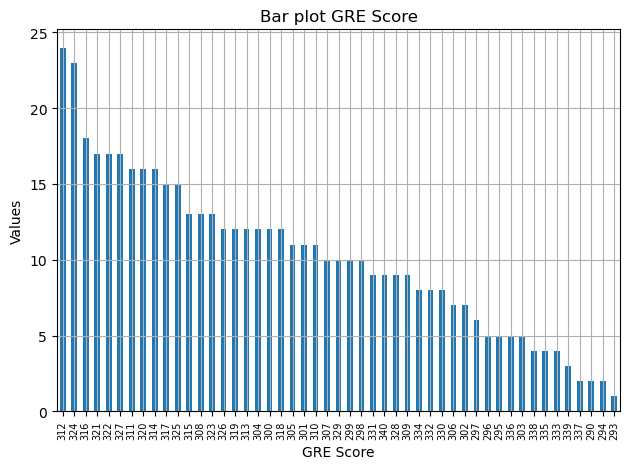

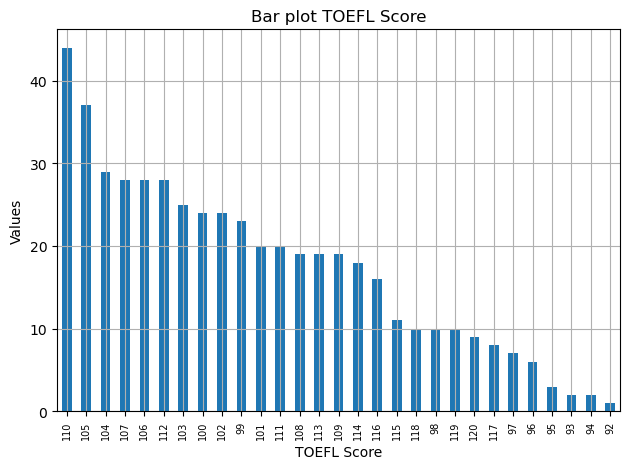

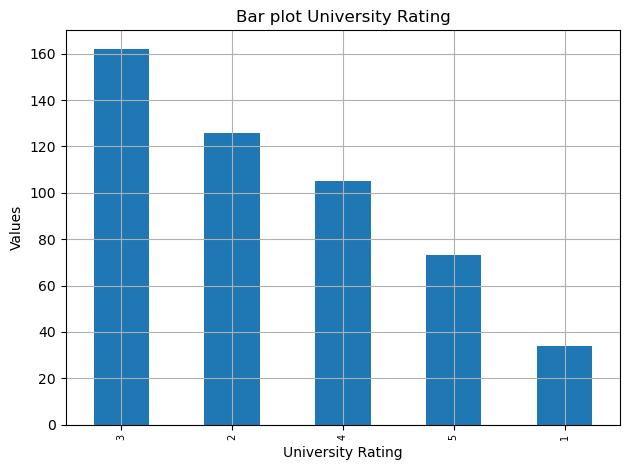

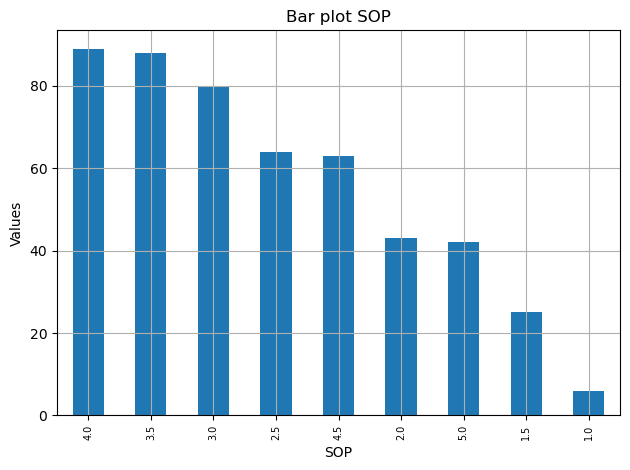

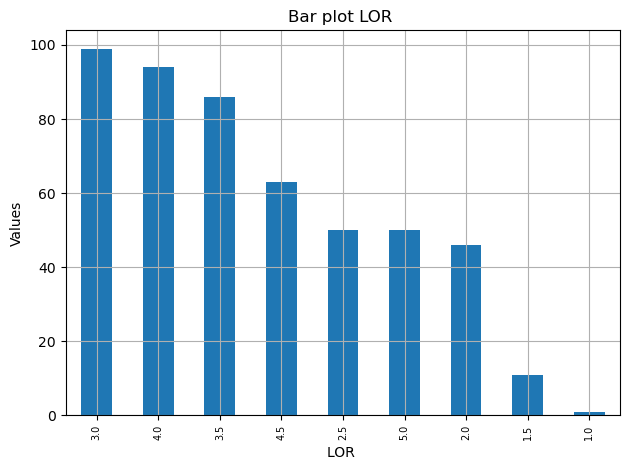

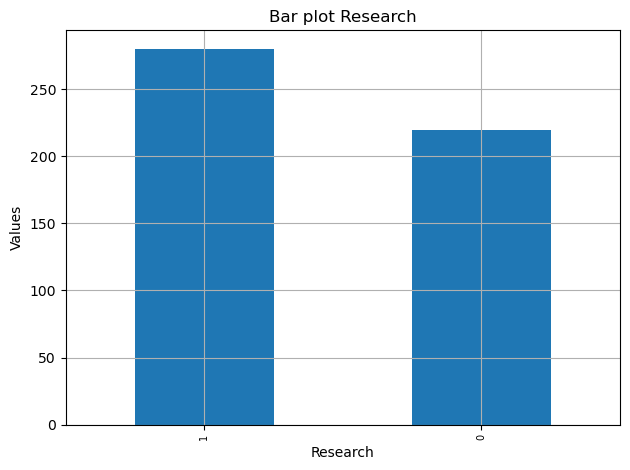

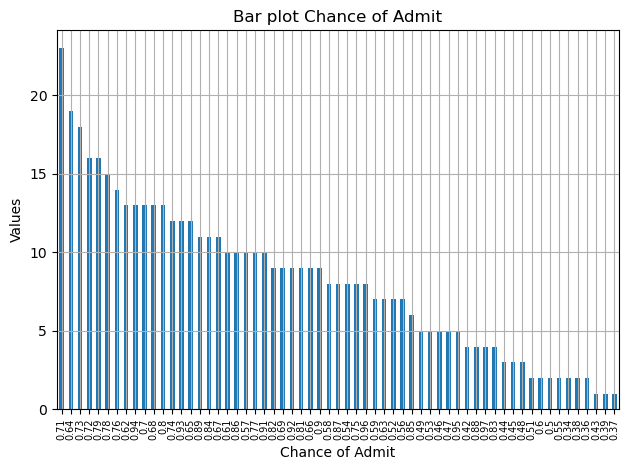

In [14]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit']:
    bar_plot(col)

In [15]:
def line_plot(col):
    plt.figure()
    data[col].value_counts().plot(kind="line",rot=90)
    plt.title(f"line plot of {col}")
    plt.xticks(fontsize=7)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

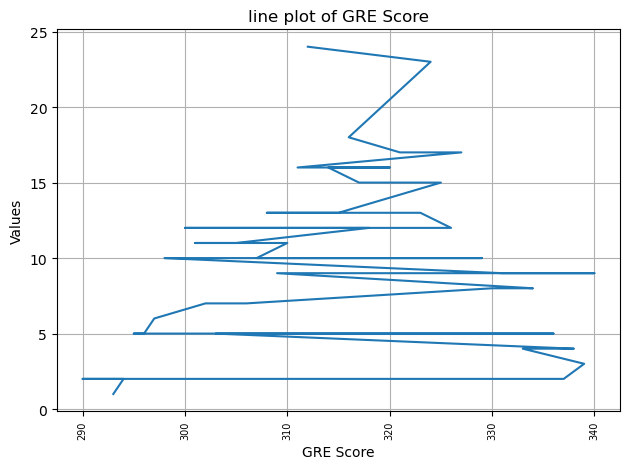

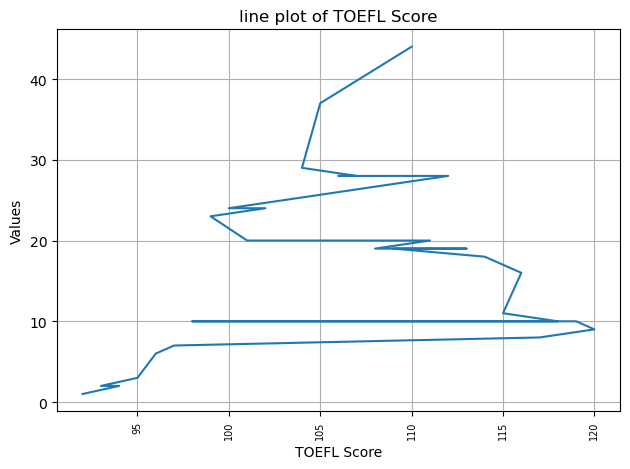

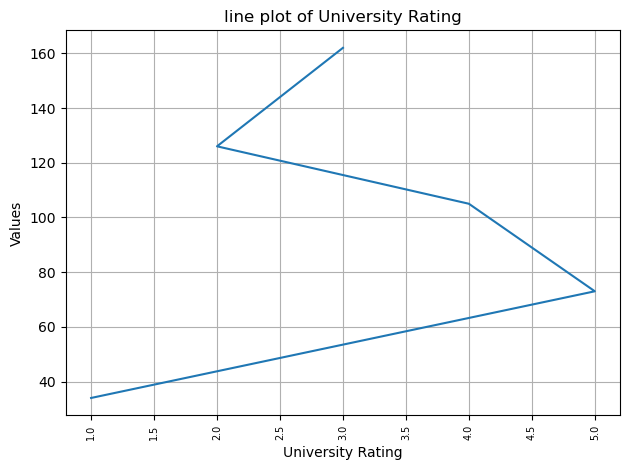

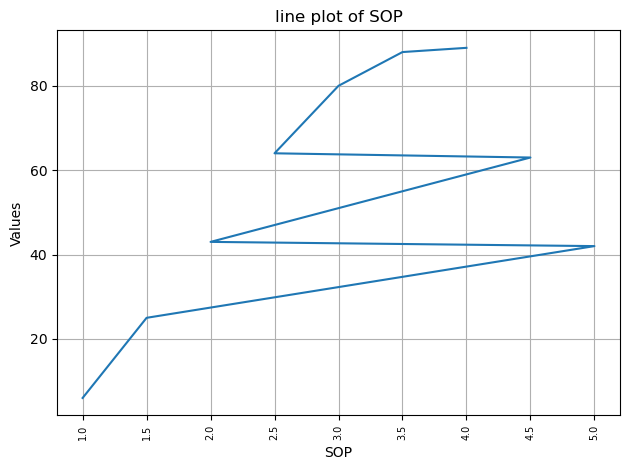

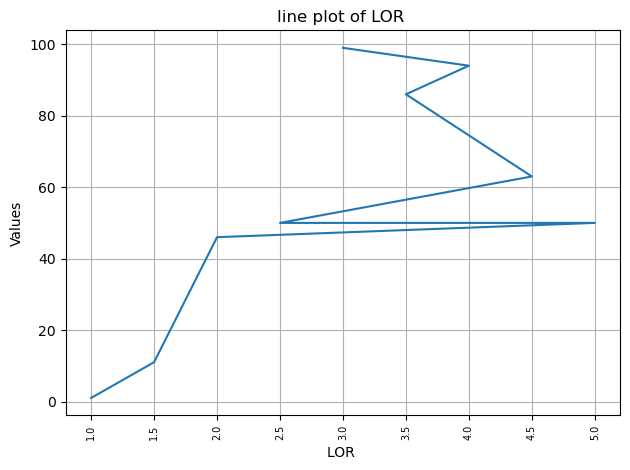

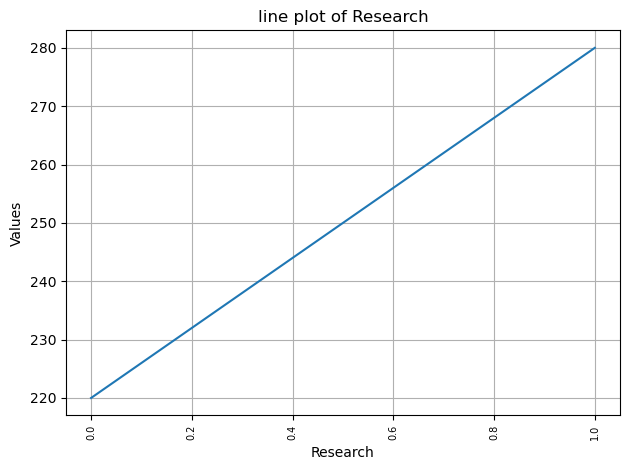

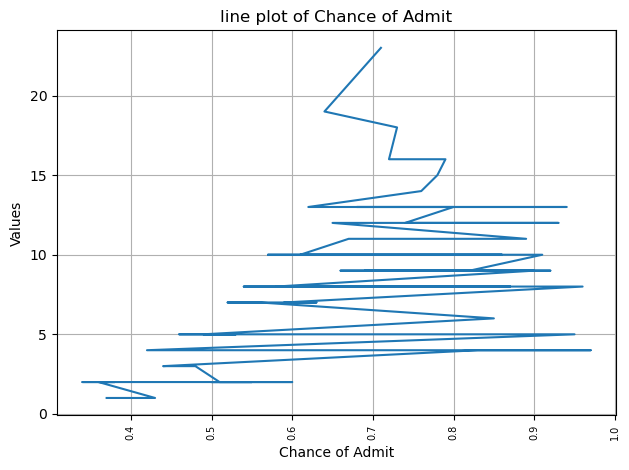

In [16]:
for col in ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit']:
    line_plot(col)

In [17]:
x=data.drop(["Serial No.","Chance of Admit"],axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [18]:
y=data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

x_train (400, 7)
y_train (400,)
x_test (100, 7)
y_test (100,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [23]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.60468196, 0.93830881, 0.90837868, 0.8124011 , 0.64578019,
       0.5950951 , 0.67020299, 0.79345736, 0.57675615, 0.63202331,
       0.76952746, 0.93703414, 0.65896025, 0.83565148, 0.72014557,
       0.64412852, 0.61676485, 0.62947103, 0.64921096, 0.80499075,
       0.91863431, 0.67761204, 0.78646302, 0.87435599, 0.6717822 ,
       0.74192399, 0.6429483 , 0.66053017, 0.67362088, 0.61838159,
       0.68080987, 0.76036747, 0.51313655, 0.72504344, 0.52875779,
       0.55966515, 0.81669818, 0.61796696, 0.61993894, 0.83290058,
       0.68684034, 0.63188784, 0.8434419 , 0.6440661 , 0.74020747,
       0.71437027, 0.88378116, 0.95024603, 0.65538047, 0.60998917,
       0.66520432, 0.76845002, 0.70034509, 0.84419447, 0.62068541,
       0.88782633, 0.8465475 , 0.82624539, 0.6085071 , 0.561074  ,
       0.66905261, 0.65506882, 0.89681362, 0.73366392, 0.59767437,
       0.96041762, 0.65099866, 0.75091822, 0.64699408, 0.60969978,
       0.58722077, 0.70212684, 0.43981858, 0.64657729, 0.70109

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
rmse


0.06008128070745858

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [28]:
select_models=[LinearRegression(),
              DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
              RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [29]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("---------")
    print(f"List of R Square {my_r_square}")
    adj_r_sqaured_test= 1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r2_squared_test")
    adj_r2_square_value.append(adj_r_sqaured_test)
    print(f"Adjusted R Square{adj_r2_square_value} of model {model}")
    print("---------")
    print(f"Adjusted R Square {adj_r2_square_value}")

RMSE value [0.06008128070745858] and R Squared value [0.7249679343887472] of model LinearRegression()
List of Rmse [0.06008128070745858]
---------
List of R Square [0.7249679343887472]
LinearRegression(),adj_r2_squared_test
Adjusted R Square[0.7040415815704997] of model LinearRegression()
---------
Adjusted R Square [0.7040415815704997]
RMSE value [0.06008128070745858, 0.08455857601555135] and R Squared value [0.7249679343887472, 0.509626750870375] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06008128070745858, 0.08455857601555135]
---------
List of R Square [0.7249679343887472, 0.509626750870375]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r2_squared_test
Adjusted R Square[0.7040415815704997, 0.47231574278442534] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
---------
Adjusted R Square [0.7040415815704997, 0.47231574278442534]
RMSE value [0.06008128070745858, 0.08455857601555135, 0.062745715090

In [30]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.06008128070745858, 0.08455857601555135, 0.06274571509023574],
 [0.7249679343887472, 0.509626750870375, 0.6866904276166413],
 [0.7040415815704997, 0.47231574278442534, 0.662851655804864]]

In [31]:
a=pd.DataFrame(data=result,columns=["LinearRegression","DecisionTree","RandomForest"],index=["my_rmse","my_r_square","adj_r2_square_value"])
a

,LinearRegression,DecisionTree,RandomForest
my_rmse,0.060081,0.084559,0.062746
my_r_square,0.724968,0.509627,0.686690
adj_r2_square_value,0.704042,0.472316,0.662852


In [32]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Box plot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

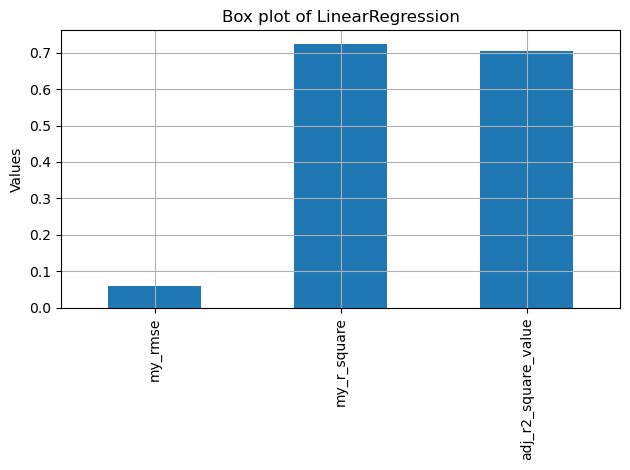

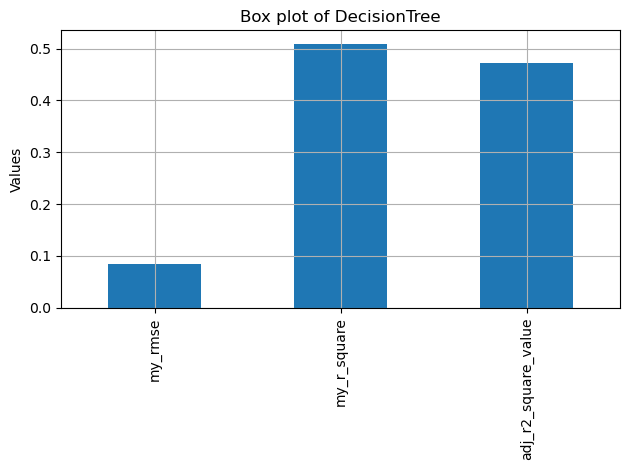

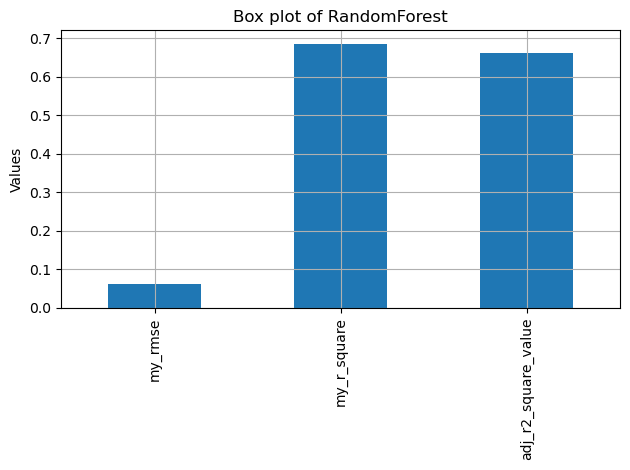

In [33]:
for col in a.columns:
    my_model_plot(col)

Text(0, 0.5, 'values')

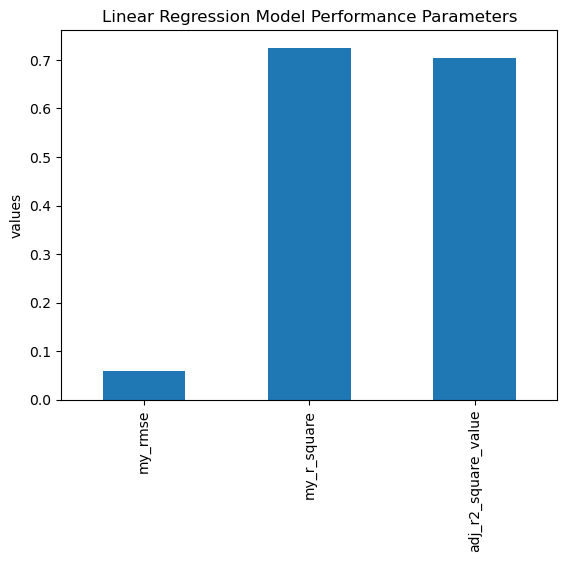

In [34]:
a.LinearRegression.plot(kind="bar")
plt.title("Linear Regression Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

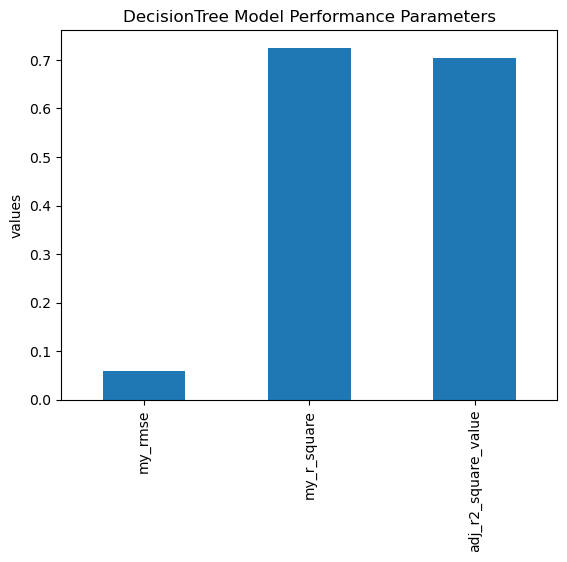

In [35]:
a.LinearRegression.plot(kind="bar")
plt.title("DecisionTree Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

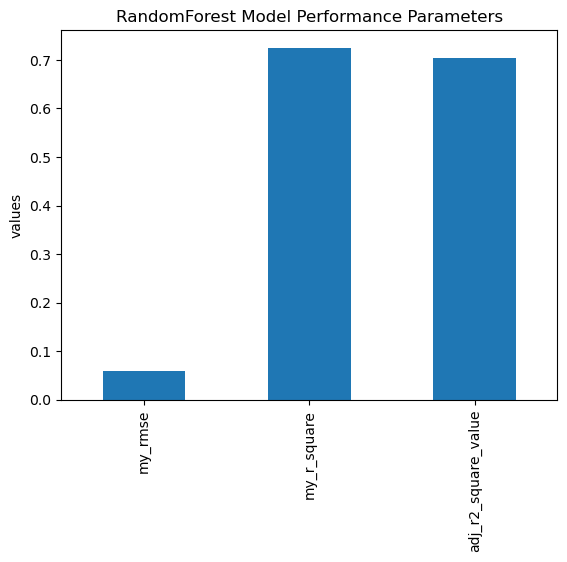

In [36]:
a.LinearRegression.plot(kind="bar")
plt.title("RandomForest Model Performance Parameters")
plt.ylabel("values")

In [37]:
rf=RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)

In [38]:
rf.fit(x_train,y_train)
rf.predict(x_test)

array([0.57104123, 0.92293183, 0.91584167, 0.81265996, 0.62138063,
       0.60666135, 0.62582873, 0.76108952, 0.6195644 , 0.64766508,
       0.76906516, 0.9339871 , 0.70400786, 0.88640095, 0.71135821,
       0.6565221 , 0.63606674, 0.63355094, 0.62633167, 0.80335131,
       0.91901329, 0.68921512, 0.7696548 , 0.91065349, 0.69734119,
       0.73375381, 0.63400187, 0.68973353, 0.65356448, 0.66047171,
       0.69145349, 0.75297238, 0.54493524, 0.69832381, 0.54388345,
       0.5974381 , 0.81953016, 0.62258939, 0.63729329, 0.85720831,
       0.73331405, 0.65462825, 0.83844585, 0.66060512, 0.73958262,
       0.72989377, 0.89386577, 0.94064979, 0.64454964, 0.64826988,
       0.66233111, 0.76530746, 0.68294056, 0.84220278, 0.63711754,
       0.91292353, 0.86108621, 0.80735992, 0.62659468, 0.54394738,
       0.68796044, 0.67258254, 0.90342591, 0.70826385, 0.62721876,
       0.93137353, 0.65897452, 0.74380309, 0.59143202, 0.60651058,
       0.57207964, 0.73109956, 0.46055202, 0.65839687, 0.67281

In [39]:
rf=RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)
rf.fit(x_train,y_train)
rf.predict(x_test)

array([0.57283071, 0.92283274, 0.91387579, 0.81871433, 0.64239722,
       0.6066223 , 0.63019171, 0.75475155, 0.6164273 , 0.66245294,
       0.7736044 , 0.9339173 , 0.70237029, 0.89261619, 0.71620122,
       0.66312472, 0.65224937, 0.62747425, 0.64405321, 0.80501972,
       0.91652202, 0.69841274, 0.77281683, 0.91270008, 0.68912905,
       0.73576777, 0.63154821, 0.68132909, 0.66502365, 0.6646824 ,
       0.69070857, 0.76045155, 0.52036671, 0.71717643, 0.55209726,
       0.59907123, 0.82243722, 0.6327594 , 0.63223222, 0.86206766,
       0.72645635, 0.67076668, 0.83577159, 0.65993524, 0.75081988,
       0.72770294, 0.88359774, 0.94043083, 0.65199421, 0.63571754,
       0.66288167, 0.76412675, 0.6915676 , 0.83891409, 0.64603524,
       0.9130674 , 0.85989778, 0.81044718, 0.64154313, 0.55707417,
       0.68238256, 0.66782813, 0.90510694, 0.71471682, 0.62791115,
       0.93378222, 0.65204484, 0.7465625 , 0.59421481, 0.60392607,
       0.56287798, 0.72645349, 0.46365183, 0.65944337, 0.64832

In [42]:
import pickle
pickle.dump(rf,open("case_study_university.pkl","wb"))